# **Imports**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
from matplotlib import cm
from PIL import Image, ImageFilter

# Read Image

(524, 852, 3)


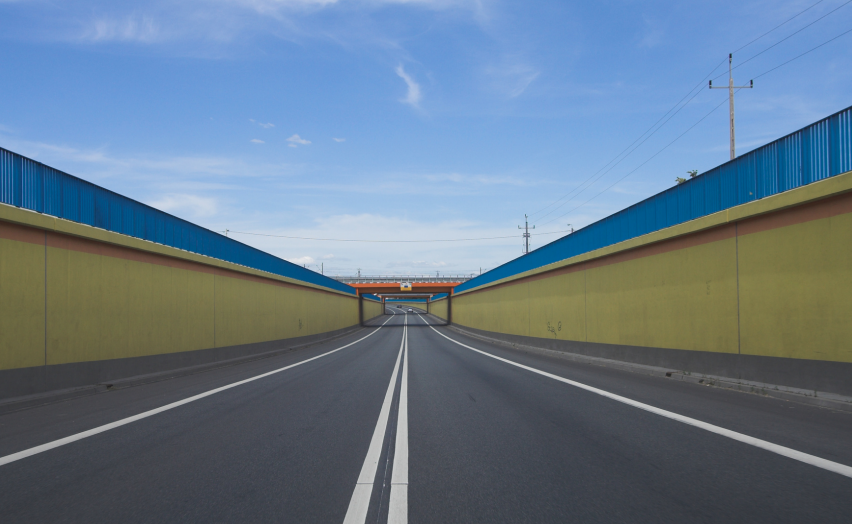

In [ ]:
img = cv2.imread('/content/testHough1.png')
print(img.shape)
cv2_imshow(img)

# Read Grayscale image

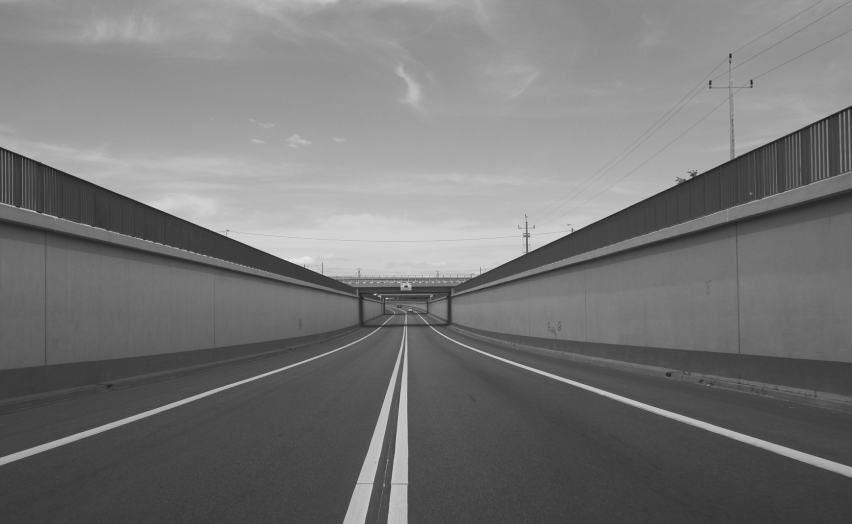

In [ ]:
gray_img = cv2.imread('/content/testHough1.png', 0)
cv2_imshow(gray_img)

# Noise reduction using Median filter


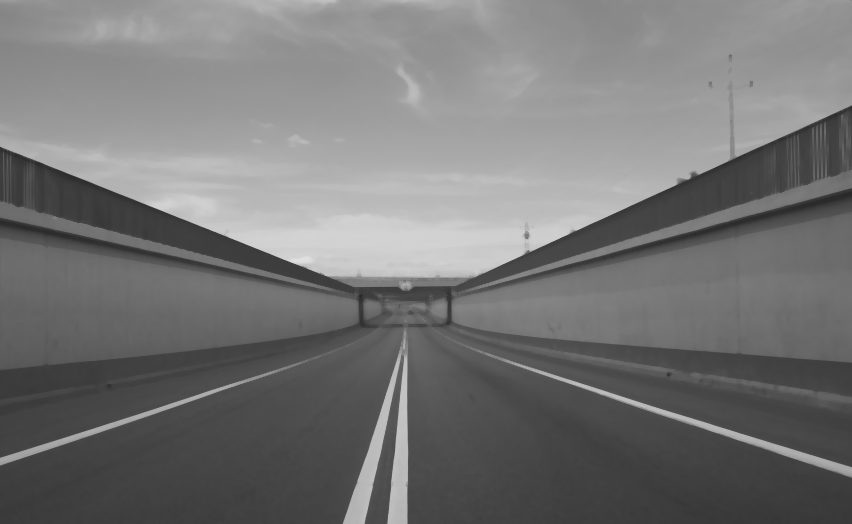

In [ ]:
median_img = cv2.medianBlur(gray_img,5)
cv2_imshow(median_img)

# Edge detection using Canny`s algorithm


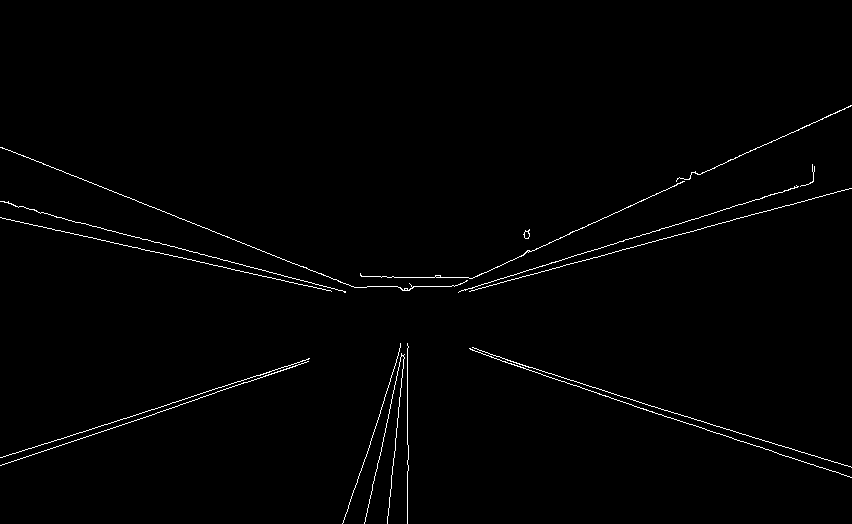

In [ ]:
edge = cv2.Canny(median_img, 100, 245)
cv2_imshow(edge)

# Region of interrest
Using fillPoly we covered the unwanted edges

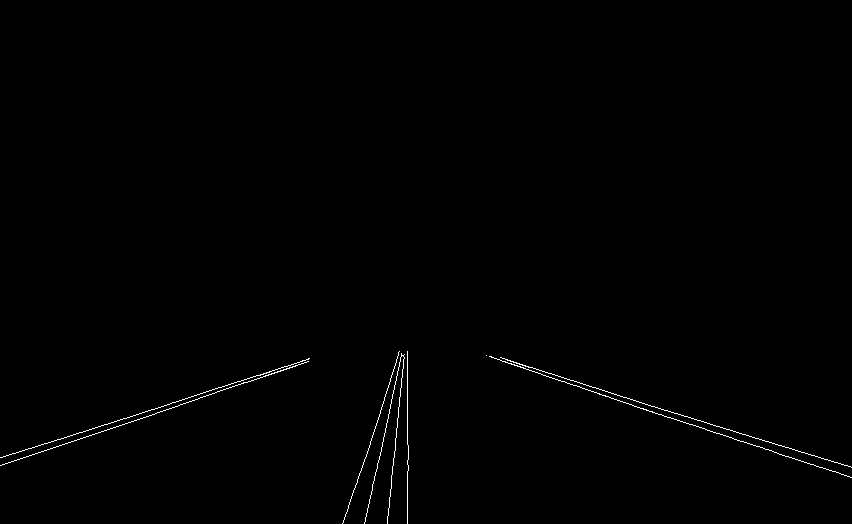

In [ ]:
points = np.array([[0,400] , [350,350], [450,350],[852,400],[852,0],[0,0]])
cv2.fillPoly(edge, pts=[points], color=(0, 0, 0))

cv2_imshow(edge)

# Accumulation into (ρ, θ)-space using Hough transform

In [ ]:
diagonal = np.sqrt(edge.shape[0]**2+edge.shape[1]**2)
diagonal = round(diagonal)

H = np.zeros((2*diagonal, 361), dtype=np.uint8)

for i in range(edge.shape[0]):
  for j in range(edge.shape[1]):
    if(edge[i][j]==255):
      for theta in range(361):
        p =round(j*math.cos(np.deg2rad(theta)) + i*math.sin(np.deg2rad(theta)))
        H[p][theta]=H[p][theta]+1


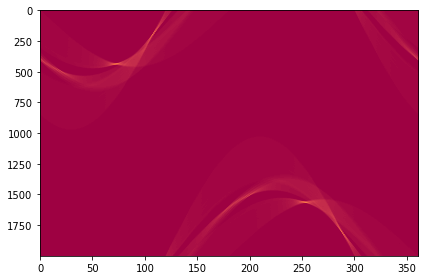

In [ ]:
fig = plt.figure()
plt.imshow(H,cmap=cm.Spectral, aspect='auto')
plt.tight_layout()
plt.show()

# Thresholding on the Accumulator array
Removing lines with lower votes than a specific threshold 

In [ ]:
for i in range(H.shape[0]):
  for j in range(H.shape[1]):
    if H[i][j]<100:
      H[i][j]=0

# Non-maximum suppression method

In [ ]:
def box(starti,startj,kernel,arr):
  max = 0
  theta=0
  p=0
  for a in range(starti,starti+kernel):
    for b in range(startj,startj+kernel):
      if a<arr.shape[0] and b<arr.shape[1]:
        if arr[a][b]>max:
          arr[p][theta] = 0
          max= arr[a][b]
          theta=b
          p=a
        else:
          arr[a][b]=0
  return theta,p


def max_filter(arr,k):
  res = []
  for i in range(0,arr.shape[0],k//4):
    if (i==0)or((i+k)<arr.shape[0] and i!=0):
      for j in range(0,arr.shape[1],k//4):
        if (j==0)or((j+k)<arr.shape[1] and j!=0):
          theta,p = box(i,j,k,arr)
          if not(theta==0 and p==0):
            res.append([theta,p])
  
  return res

# Refining Coordinates and HT Post-Processing
Appling Non-maximum suppression method and drawing the lines returned fron the method

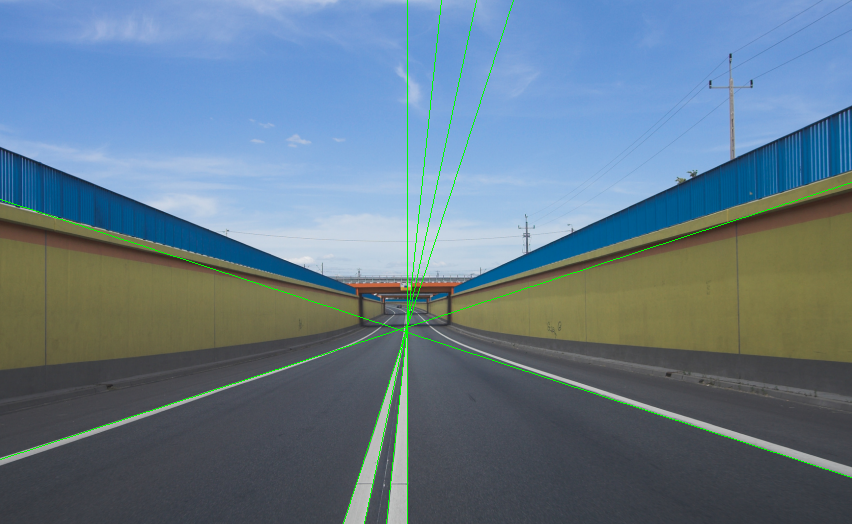

In [ ]:
img = cv2.imread('/content/testHough1.png')

lines = max_filter(H,15)
for i in range(len(lines)):
      a = np.cos(np.deg2rad(lines[i][0]))
      b = np.sin(np.deg2rad(lines[i][0]))
      x0 = a*lines[i][1]
      y0 = b*lines[i][1]
      x1 = int(x0 + 10000*(-b))
      y1 = int(y0 + 10000*(a))
      x2 = int(x0 - 10000*(-b))
      y2 = int(y0 - 10000*(a))

      cv2.line(img,(x1,y1),(x2,y2),(0,255,0),1)
      

cv2_imshow(img)


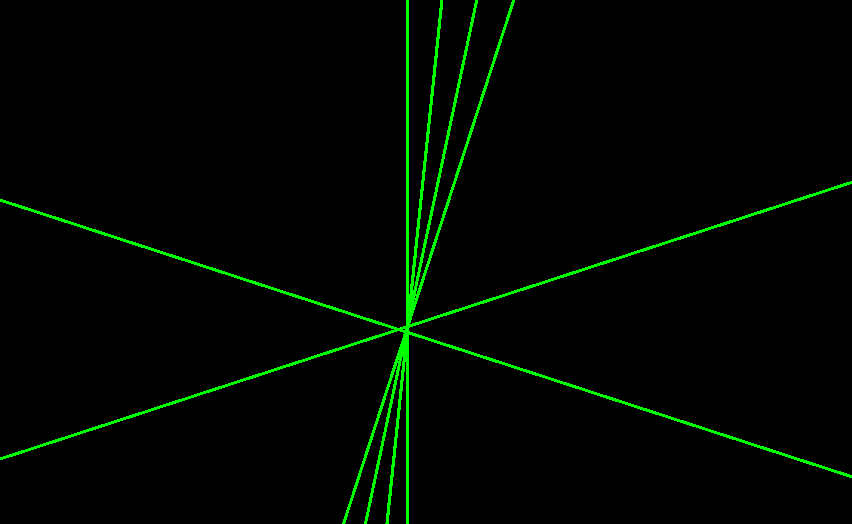

In [ ]:
lanes = np.zeros_like(img)
for i in range(len(lines)):
  a = np.cos(np.deg2rad(lines[i][0]))
  b = np.sin(np.deg2rad(lines[i][0]))
  x0 = a*lines[i][1]
  y0 = b*lines[i][1]
  x1 = int(x0 + 10000*(-b))
  y1 = int(y0 + 10000*(a))
  x2 = int(x0 - 10000*(-b))
  y2 = int(y0 - 10000*(a))

  cv2.line(lanes,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(lanes)

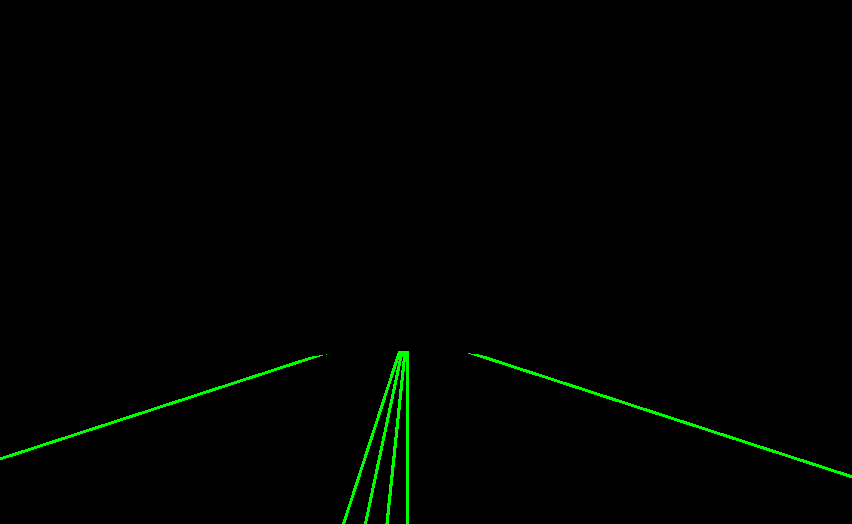

In [ ]:
points = np.array([[0,400] , [350,350], [450,350],[852,400],[852,0],[0,0]])
cv2.fillPoly(lanes, pts=[points], color=(0, 0, 0))
cv2_imshow(lanes)

# **The Final Output**

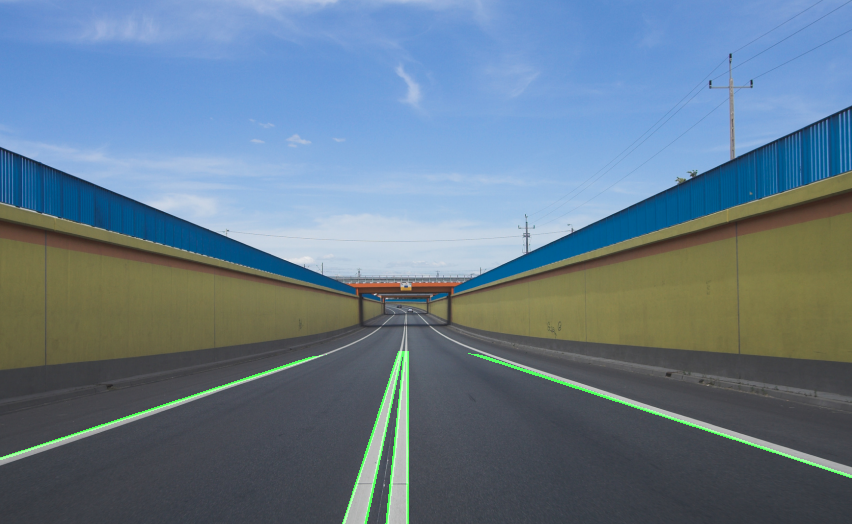

In [ ]:
img = cv2.imread('/content/testHough1.png')
cv2_imshow(cv2.bitwise_or(img, lanes))